# World Data
Plotting of different measures related to healthcare and research situations in 204 countries worldwide (data from the WHO reports 2019)

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



DATAPATH = "../data"
FIGUREPATH = "../figures"

In [2]:
eosi = {
    "dark": "#50285a",
    "gray": "#d2d2d0",
    "green": "#bee6b4",
    "white": "#ffffff",
    "purple": "#aa96fa",
    "pink": "#dca0dc",
    "yellow": "#fad782",
    "blue": "#8cc8fa",
    "red": "#faa08c"
}

disease_colors = {
    "C": eosi["dark"],
    "N": eosi["green"],
    "I": eosi["gray"],
    "O": eosi["blue"]
}

income_colors = {
    "HIC": eosi["yellow"],
    "UMIC": eosi["red"],
    "LMIC": eosi["pink"],
    "LIC": eosi["purple"] 
}

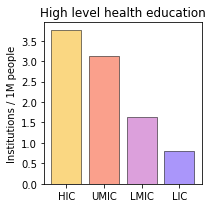

In [16]:
#Number of high education centres per 1M inhabitants (WHO data 2019)
#data: https://www.who.int/observatories/global-observatory-on-health-research-and-development/monitoring/worldwide-status-of-higher-education-institutions-offering-disciplines-related-to-research-for-health

edu = {
    "HIC": 3.761,
    "UMIC": 3.126,
    "LMIC": 1.636,
    "LIC": 0.805
}

labels = ["HIC", "UMIC", "LMIC", "LIC"]

fig, ax = plt.subplots(1,1, figsize=(3,3))
x = [i for i in range(len(edu))]
y = [edu[l] for l in labels]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Institutions / 1M people")
ax.set_title("High level health education")
ax.bar(x, y, color = [income_colors[l] for l in labels], edgecolor="black", lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH, "high_level_edu.png"), dpi=300)

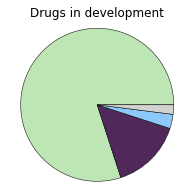

In [19]:
#Drugs currently in development by disease indication (updated Dec2021)
#https://www.who.int/observatories/global-observatory-on-health-research-and-development/monitoring/health-products-in-the-pipeline-from-discovery-to-market-launch-for-all-diseases
drugs = {
    "C": 15,
    "N": 80,
    "O": 3,
    "I": 2
}

dlabs = ["N", "C", "O", "I"]
fig, ax = plt.subplots(1,1,figsize=(2.8,2.8))
sizes = [drugs[x] for x in dlabs]
ax.pie(sizes, labels=None, colors=[disease_colors[d] for d in dlabs], wedgeprops={"edgecolor":"black", "lw": 0.5})
ax.axis('equal')
ax.set_title("Drugs in development")
plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"drugpie.png"), dpi=300)

In [20]:
#load data by country extracted from the WHO 2020 (pre-covid reports)
#includes population by country, DALY by disease and research output
#data sources: world data bank 2021, WHO Monitoring Report 2021, Springer Nature AdisInsight

df = pd.read_csv(os.path.join(DATAPATH, "DataByCountry.csv"))

In [21]:
df.columns

Index(['Country', 'Code', 'Population', 'Income', 'DalyALL', 'DalyCom',
       'DalyEnteric', 'DalyHiv', 'DalyInjury', 'DalyMalaria', 'DalyMaternal',
       'DalyNcd', 'DalyNutrition', 'DalyInfOther', 'DalyTb', 'DalyNtd',
       'DalyResp', 'SePublications'],
      dtype='object')

In [68]:
income = {}
income["LIC"] = df[df["Income"]=="LIC"].index.tolist()
income["LMIC"] = df[df["Income"]=="LMIC"].index.tolist()
income["UMIC"] = df[df["Income"]=="UMIC"].index.tolist()
income["HIC"] = df[df["Income"]=="HIC"].index.tolist()

publ={}
for k,v in income.items():
    publ_list = []
    for i in v:
        publ_list += [df.loc[i]["SePublications"]]
    publ[k] = publ_list

    
publ_perc = {}
for k,v in publ.items():
    publ_perc[k]=((np.nansum(v)/np.nansum(df["SePublications"].tolist()))*100).round(2)   

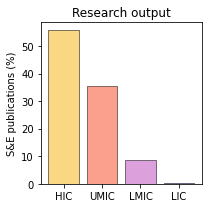

In [74]:

labels = ["HIC", "UMIC", "LMIC", "LIC"]

fig, ax = plt.subplots(1,1, figsize=(3,3))
x = [i for i in range(len(publ_perc))]
y = [publ_perc[l] for l in labels]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("S&E publications (%)")
ax.set_title("Research output")
ax.bar(x, y, color = [income_colors[l] for l in labels], edgecolor="black", lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH, "publications.png"), dpi=300)

In [89]:
# % of total DALY by disease type and income

# sum all DALY by income
dalyall = {}
for k,v in income.items():
    daly_list = []
    for i in v:
        daly_list += [df.loc[i]["DalyALL"]]
    dalyall[k] = np.nansum(daly_list)

# sum each disease type DALY
dalyncd = {}
for k,v in income.items():
    daly_list = []
    for i in v:
        daly_list += [df.loc[i]["DalyNcd"]]
    dalyncd[k] = np.nansum(daly_list)
    
dalycom = {}
for k,v in income.items():
    daly_list = []
    for i in v:
        daly_list += [df.loc[i]["DalyCom"]]
    dalycom[k] = np.nansum(daly_list)
    
dalyinj = {}
for k,v in income.items():
    daly_list = []
    for i in v:
        daly_list += [df.loc[i]["DalyInjury"]]
    dalyinj[k] = np.nansum(daly_list)


# obtain % of total DALY by income
dalys = {"HIC":{}, "UMIC":{}, "LMIC": {}, "LIC": {}}

for k,v in dalyall.items():
    for k2, v2 in dalycom.items():
        if k == k2:
            dalys[k]["C"]=(v2/v*100).round(2)
    for k2, v2 in dalyncd.items():
        if k == k2:
            dalys[k]["N"]=(v2/v*100).round(2) 
    for k2, v2 in dalyinj.items():
        if k == k2:
            dalys[k]["I"]=(v2/v*100).round(2)

In [90]:
dalys

{'HIC': {'C': 4.64, 'N': 85.84, 'I': 9.52},
 'UMIC': {'C': 10.98, 'N': 78.15, 'I': 10.87},
 'LMIC': {'C': 37.36, 'N': 53.26, 'I': 9.38},
 'LIC': {'C': 56.22, 'N': 34.96, 'I': 8.82}}

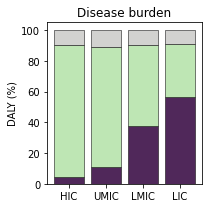

In [94]:
dis = ["Communicable", "Non-Communicable", "Injuries"]

fig, ax = plt.subplots(1,1,figsize=(3,3))

v_ = None
for j in range(len(dis)):
    v = []
    x = []
    for i in range(len(labels)):
        s = dalys[labels[i]][dis[j][0]]
        v += [s]
        x += [i]
    ax.bar(x, v, bottom=v_, color=disease_colors[dis[j][0]], lw=0.5, edgecolor="black")
    if v_ is None:
        v_ = v[:]
    else:
        v_ = [x+y for x,y in zip(v, v_)]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("DALY (%)")
ax.set_title("Disease burden")
plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH, "burden.png"), dpi=300)

In [101]:
# choropleth representation of % of DALY due to Communicable Diseases
# code ref: https://plotly.com/python/choropleth-maps/#reference

import plotly.graph_objects as go
import plotly.io as pio
colors=[[0, '#ffffff'], [0.8, '#50285a'],[1,"#371540"]]

#add column of % of DALY Com per country
df["PropCom"] = df.apply(lambda row: (row.DalyCom/row.DalyALL*100), axis=1)

fig = go.Figure(data=go.Choropleth(
    locations=df["Code"],
    z = df["PropCom"],
    text=df["Country"],
    colorscale = colors,
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = None,
    colorbar_title = '% of total<br>DALY',
))
fig.update_traces(
    colorbar_thicknessmode="pixels",
    colorbar_thickness = 10,
    zmax=100,
    zmin=0
)


fig.update_layout(
    title=dict(
        text='% of healthy years lost to communicable diseases',
        xanchor="center",
        x=0.5
    ),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth'
    )
)
fig.show()

fig.write_image(os.path.join(FIGUREPATH,"DalyCom_worldmap.png"), scale=20)

AttributeError: 'Figure' object has no attribute 'save_image'

In [ ]:
# from Smith, BenchSci 2017, reasons for lack of AI/ML deployment (survey of +300 scientists)

ai = {
    "Lack of knowledge and expertise about the technology": 62,
    "Cost": 43,
    "Lack of knowledge and expertise about available companies and tools": 42,
    "Lack of relevant case studies for my organization": 28,
    "Disfelief in the benefits of artificial intelligence for drug discovery in general": 19,
    "Cultural barriers, such as status quo": 18,
    "Concern about data security and privacy": 16,
    "Disbelief in the benefits of artificial intelligence specifically for my organization": 10,
    "Other":4
}

In [ ]:
from matplotlib.patches import FancyBboxPatch

barriers=list(ai)
percentage=list(ai.values())

fig, ax = plt.subplots(1,1, figsize=(3,4))
ax.set_title("Barriers to AI implementation")
ax.barh(barriers, percentage, color = "#aa96fa", edgecolor="black", lw=0.5)
ax.invert_yaxis()

new_patches = []
for patch in reversed(ax.patches):
    # print(bb.xmin, bb.ymin,abs(bb.width), abs(bb.height))
    bb = patch.get_bbox()
    #color = patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=-0.0050,rounding_size=1",
                            ec="none", color = "#dca0dc",
                            mutation_aspect=0.2
                            )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)

plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH, "AIbarriers.png"), dpi=300)

In [3]:
#malaria death rate per 100.000 habs (World in Data)
df = pd.read_csv("../data/malaria-death-rates.csv")
#clean who regions
df = df.dropna(axis=0, subset=["Code"])
#select year 2019
df = df[df["Year"]==2019]
df.rename(columns = {"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate)":"Rate"}, inplace = True)
df.head()


,Entity,Code,Year,Rate
29,Afghanistan,AFG,2019,1.663685
89,Albania,ALB,2019,0.000000
119,Algeria,DZA,2019,0.000204
149,American Samoa,ASM,2019,0.000000
179,Andorra,AND,2019,0.000000


In [24]:
import plotly.graph_objects as go
import plotly.io as pio
colors=[[0, '#f5f5f5'], [0.2, "#cba1d5"], [0.8, '#50285a'],[1,"#321938"]]

fig = go.Figure(data=go.Choropleth(
    locations=df["Code"],
    z = df["Rate"],
    text=df["Entity"],
    colorscale = colors,
    autocolorscale=False,
    reversescale=False,
    marker_line_color='black',
    marker_line_width=0.25,
    colorbar_tickprefix = None,
    colorbar_title = 'Deaths/100.000 habs',
))


config = {"responsive":False}

fig.update_traces(
    colorbar_thicknessmode="pixels",
    colorbar_thickness = 10,
    zmax=100,
    zmin=0
)


fig.update_layout(
    title=dict(
        text='Malaria death rate (habs/100.000)',
        xanchor="center",
        x=0.5
    ),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth'
    )
)
fig.show(config=config)

#fig.write_image(os.path.join(FIGUREPATH,"malaria_worldmap_test.png"), scale=20)

In [23]:
import plotly.graph_objects as go
import plotly.io as pio
colors=[[0, "#50285a"],[0.1, "#fad782"], [1,"#faa08c"]]

fig = go.Figure(data=go.Choropleth(
    locations=df["Code"],
    z = df["Rate"],
    text=df["Entity"],
    colorscale = colors,
    autocolorscale=False,
    reversescale=False,
    marker_line_color='#dca0dc',
    marker_line_width=0.3,
    colorbar_tickprefix = None,
    colorbar_title = 'Deaths/100.000 habs',
))


config = {"responsive":False}

fig.update_traces(
    colorbar_thicknessmode="pixels",
    colorbar_thickness = 10,
    zmax=100,
    zmin=0
)


fig.update_layout(
    title=dict(
        text='Malaria death rate (habs/100.000)',
        xanchor="center",
        x=0.5
    ),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth',
        bgcolor='#50285a',
        lakecolor='#50285a',
    )
)
fig.show(config=config)

fig.write_image(os.path.join(FIGUREPATH,"malaria_worldmap_plum_hiRes.pdf"))

In [5]:
import plotly.graph_objects as go
import plotly.io as pio
colors=[[0, '#50285a'], [0.2, "#50285a"], [0.8, '#50285a'],[1,"#50285a"]]

fig = go.Figure(data=go.Choropleth(
    locations=df["Code"],
    text=df["Entity"],
    colorscale = colors,
    autocolorscale=False,
    reversescale=False,
    marker_line_color='#50285a',
    marker_line_width=0.5,
))


config = {"responsive":False}


fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth',
        bgcolor='#50285a',
        lakecolor='#dca0dc',
        landcolor = "#dca0dc"
    )
)
fig.show(config=config)

fig.write_image(os.path.join(FIGUREPATH,"worldmap_empty_plum.pdf"))